# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning - Level ⅠⅡ 
#### Excercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Excercise 1
In this exercise, we will be using 'Temperature_data.csv'. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.

In [56]:
day_df = pd.read_csv('Temperature_data.csv')
day_df.info()
day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   ReadingDateTime          365 non-null    object 
 3   Value                    351 non-null    float64
 4   Units                    365 non-null    object 
 5   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P
...,...,...,...,...,...,...
360,RI2,TMP,27/12/2019 00:00,8.0,oC,P
361,RI2,TMP,28/12/2019 00:00,9.0,oC,P
362,RI2,TMP,29/12/2019 00:00,8.0,oC,P
363,RI2,TMP,30/12/2019 00:00,7.0,oC,P


In [57]:
day_df['ReadingDateTime'] =pd.to_datetime(day_df.ReadingDateTime)
tmp = day_df["ReadingDateTime"].dt.date
day_df.insert(3, "ReadingDate", tmp)
tmp2 = day_df["ReadingDateTime"].dt.time
day_df.insert(4, "Time", tmp2)
day_df.drop(columns=["ReadingDateTime"], inplace=True)
day_df

,Site,Species,ReadingDate,Time,Value,Units,Provisional or Ratified
0,RI2,TMP,2019-01-01,00:00:00,9.0,oC,P
1,RI2,TMP,2019-02-01,00:00:00,6.0,oC,P
2,RI2,TMP,2019-03-01,00:00:00,5.0,oC,P
3,RI2,TMP,2019-04-01,00:00:00,4.0,oC,P
4,RI2,TMP,2019-05-01,00:00:00,5.0,oC,P
...,...,...,...,...,...,...,...
360,RI2,TMP,2019-12-27,00:00:00,8.0,oC,P
361,RI2,TMP,2019-12-28,00:00:00,9.0,oC,P
362,RI2,TMP,2019-12-29,00:00:00,8.0,oC,P
363,RI2,TMP,2019-12-30,00:00:00,7.0,oC,P


The dataset needs level 1 clean because it is a standard data structure, but didn't have intuitative and codable column titles. However, every row did have a unique identifier.

    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

In [58]:
day_df.ReadingDate = pd.to_datetime(day_df.ReadingDate, format='%Y-%m-%d')
tmp = day_df["ReadingDate"].dt.year
day_df.insert(3, "Year", tmp)
tmp2 = day_df["ReadingDate"].dt.month
day_df.insert(4, "Month", tmp2)
tmp3 = day_df["ReadingDate"].dt.day
day_df.insert(5, "Day", tmp3)
day_df.drop(columns=["ReadingDate"], inplace=True)
day_df

,Site,Species,Year,Month,Day,Time,Value,Units,Provisional or Ratified
0,RI2,TMP,2019,1,1,00:00:00,9.0,oC,P
1,RI2,TMP,2019,2,1,00:00:00,6.0,oC,P
2,RI2,TMP,2019,3,1,00:00:00,5.0,oC,P
3,RI2,TMP,2019,4,1,00:00:00,4.0,oC,P
4,RI2,TMP,2019,5,1,00:00:00,5.0,oC,P
...,...,...,...,...,...,...,...,...,...
360,RI2,TMP,2019,12,27,00:00:00,8.0,oC,P
361,RI2,TMP,2019,12,28,00:00:00,9.0,oC,P
362,RI2,TMP,2019,12,29,00:00:00,8.0,oC,P
363,RI2,TMP,2019,12,30,00:00:00,7.0,oC,P


The dataset needs level 2 clean because it had a ReadingDate column that contained the months, days, and years of all the values. So I separate them into 3 columns.

    c.	The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are. 

In [59]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   Year                     365 non-null    int64  
 3   Month                    365 non-null    int64  
 4   Day                      365 non-null    int64  
 5   Time                     365 non-null    object 
 6   Value                    351 non-null    float64
 7   Units                    365 non-null    object 
 8   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 25.8+ KB


There are missing values and they're all from the values column. About 14 total missing values from our dataset

    d. Are there any outliers in the dataset?

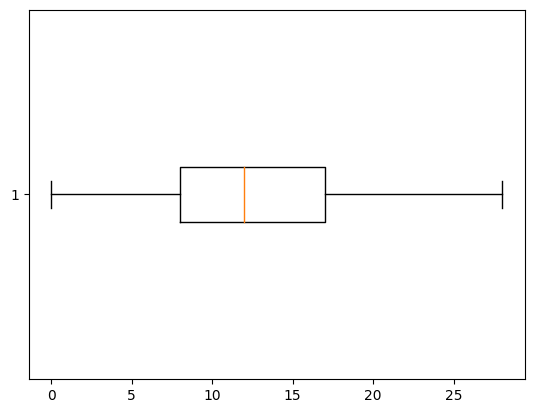

In [62]:
fig = plt.boxplot(day_df.Value.dropna(),vert=False)

There are no outliers in this dataset.

    e.	How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values. 

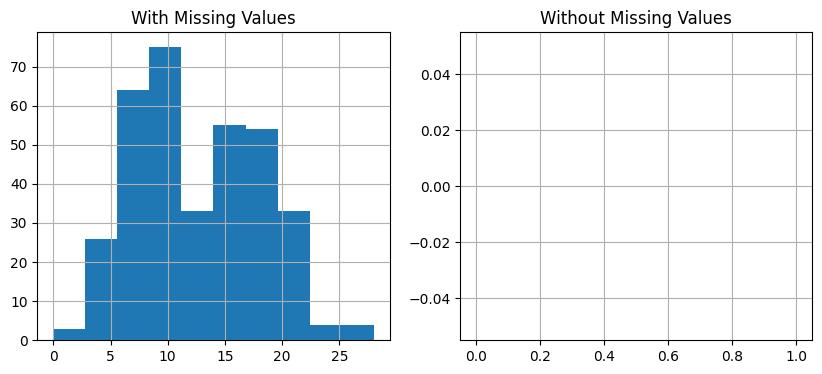

In [63]:
BM_MV = day_df.Value.isna()
temp_range = (day_df.Value.min(),day_df.Value.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    day_df[BM].Value.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

The number of missing values are so small that even without them, the overall outcome wouldn't really change. 

# Excercise 2
In this exercise, we are going to use the file ‘Iris_wMV.csv’. Iris data includes 50 samples of three types of iris flowers, totaling 150 rows of data. Each flower is described by its sepal and petal length or width. The column PetalLengthCm has some missing values.

    a. Confirm that PetalLengthCm has five missing values.  

    b. Figure out the types of missing values (MCAR, MAR, MNAR).

    c.	How would you best deal with the missing values, if your end goal was to draw the following visualization? Comment on all the four different approaches of dealing with missing values in this chapter, citing why the approach would be or wouldn’t be appropriate.

d.	Draw the preceding figure twice, once after adopting the “keep as is” approach, and once after adopting “imputing with the central tendency of the appropriate iris Species”. Compare the two figures and comment on their differences.

# Excercise 3
In this exercise, we will be using ‘imdb_top_1000.csv’. More information about this dataset maybe found on this link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows. Perform the following steps for this dataset. 

    a.	Read the file into movie_df, and list the level Ⅰ data cleaning steps that the dataset needs. Implement the listed items, if any. 

In [97]:
movie_df = pd.read_csv('imdb_top_1000.csv')
movie_df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Here are the level Ⅰ data cleaning steps that the dataset needs:


In [111]:
#First try to see how many missing values there are.
print('Number of missing values:')
for col in movie_df.columns:
    n_MV = sum(movie_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
Runtime:0
IMDB_Rating:0
Gross:169
Genre1:0
Genre2:105
Genre3:354
Rating_16:0
Rating_A:0
Rating_Approved:0
Rating_G:0
Rating_GP:0
Rating_PG:0
Rating_PG-13:0
Rating_Passed:0
Rating_R:0
Rating_TV-14:0
Rating_TV-MA:0
Rating_TV-PG:0
Rating_U:0
Rating_U/A:0
Rating_UA:0
Rating_Unrated:0
Rating_nan:0
Genre_Action, Adventure:0
Genre_Action, Adventure, Biography:0
Genre_Action, Adventure, Comedy:0
Genre_Action, Adventure, Crime:0
Genre_Action, Adventure, Drama:0
Genre_Action, Adventure, Family:0
Genre_Action, Adventure, Fantasy:0
Genre_Action, Adventure, History:0
Genre_Action, Adventure, Horror:0
Genre_Action, Adventure, Mystery:0
Genre_Action, Adventure, Romance:0
Genre_Action, Adventure, Sci-Fi:0
Genre_Action, Adventure, Thriller:0
Genre_Action, Adventure, War:0
Genre_Action, Adventure, Western:0
Genre_Action, Biography, Crime:0
Genre_Action, Biography, Drama:0
Genre_Action, Comedy, Crime:0
Genre_Action, Comedy, Fantasy:0
Genre_Action, Comedy, Mystery:0
Genre_Action,

The 'Poster_Link' column does not provide any useful information for our analysis, so it can be dropped.


In [98]:
# drop the 'Poster_Link' column
movie_df.drop('Poster_Link', axis=1, inplace=True)

The 'Series_Title' column can be renamed to 'Title' for consistency. The 'Certificate' column can be renamed to 'Rating' for consistency. The 'Released_Year' column can be renamed to 'Year' for consistency. The 'Director', 'Star1', 'Star2', 'Star3', and 'Star4' columns can be renamed to 'Director', 'Actor1', 'Actor2', 'Actor3', and 'Actor4' for consistency.

In [99]:
# rename the 'Series_Title' column to 'Title'
movie_df.rename(columns={'Series_Title': 'Title'}, inplace=True)

# rename the 'Released_Year' column to 'Year'
movie_df.rename(columns={'Released_Year': 'Year'}, inplace=True)

# rename the 'Certificate' column to 'Rating'
movie_df.rename(columns={'Certificate': 'Rating'}, inplace=True)

# rename the 'Star1', 'Star2', 'Star3', and 'Star4' columns to 'Actor1', 'Actor2', 'Actor3', and 'Actor4'
movie_df.rename(columns={'Star1': 'Actor1', 'Star2': 'Actor2', 'Star3': 'Actor3', 'Star4': 'Actor4'}, inplace=True)

The 'Runtime' column is currently a string with the format "number min", and it should be converted to a numeric data type.

In [100]:
# convert the 'Runtime' column to a numeric data type
movie_df['Runtime'] = movie_df['Runtime'].str.replace(' min', '').astype(int)

The 'Genre' column may contain multiple genres for some movies, and it may be useful to split them into separate columns.

In [101]:
# split the 'Genre' column into separate columns
genres = movie_df['Genre'].str.split(',', expand=True)
genres.columns = ['Genre1', 'Genre2', 'Genre3']
movie_df = pd.concat([movie_df, genres], axis=1)

The 'Overview' column contains a brief description of each movie, and it may need to be cleaned of any unnecessary formatting or special characters.

In [102]:
# clean the 'Overview' column
movie_df['Overview'] = movie_df['Overview'].str.strip()

The 'Meta_score' column contains missing values, and it may be useful to handle them appropriately.

In [103]:
# handle missing values in the 'Meta_score' column
movie_df['Meta_score'].fillna(0, inplace=True)
movie_df['Meta_score'] = movie_df['Meta_score'].astype(int)

The 'No_of_Votes' column is currently a numeric data type with no commas to properly read the numbers. So, we'll have to add some commas.

In [104]:
# add commas to the 'No_of_Votes' column
movie_df['No_of_Votes'] = movie_df['No_of_Votes'].apply(lambda x: '{:,}'.format(x))

movie_df.head()

,Title,Year,Rating,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Actor1,Actor2,Actor3,Actor4,No_of_Votes,Gross,Genre1,Genre2,Genre3
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,343,110","28,341,469",Drama,None,None
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,620,367","134,966,411",Crime,Drama,None
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,303,232","534,858,444",Action,Crime,Drama
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"1,129,952","57,300,000",Crime,Drama,None
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"689,845","4,360,000",Crime,Drama,None


    b.	We want to employ a Decision Tree Classificaiton algorithm using the following columns to predict the IMDB_rating: Certificate, Runtime, Genre, and Gross. For this analytics goals, list the level 2 data cleanings that need to be done, and then implement them.  

In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Drop unwanted columns
movie_df = movie_df.drop(['Title', 'Year', 'Overview', 'Meta_score', 'Director', 'Actor1', 'Actor2', 'Actor3', 'Actor4', 'No_of_Votes'], axis=1)


In [107]:
# Encode categorical variables using one-hot encoding
ohe_columns = ['Rating', 'Genre']
ohe_encoder = OneHotEncoder(sparse=False)
ohe_encoded = ohe_encoder.fit_transform(movie_df[ohe_columns])
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns=ohe_encoder.get_feature_names_out(ohe_columns))

c:\Users\ccobr\OneDrive\Desktop\INST 447\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
# Replace the categorical columns with their encoded versions
movie_df = pd.concat([movie_df.drop(ohe_columns, axis=1), ohe_encoded_df], axis=1)

In [109]:
# Scale the numeric variables using MinMaxScaler
scaler_columns = ['Runtime', 'Gross']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(movie_df[scaler_columns])
scaled_df = pd.DataFrame(scaled, columns=scaler_columns)

ValueError: could not convert string to float: '28,341,469'

In [117]:
# Replace the unscaled columns with their scaled versions
movie_df = pd.concat([movie_df.drop(scaler_columns, axis=1), scaled_df], axis=1)

NameError: name 'scaled_df' is not defined

In [116]:
# Separate the target variable 'IMDB_Rating' from the input features
X = movie_df.drop('IMDB_Rating', axis=1)
y = movie_df['IMDB_Rating']

    c.	Does the dataset have issues, regarding missing values? If yes, how best should we deal with them given the listed data analytic goals in b. 

The dataset does have issues with missing values but for the most part we could just fill them in with either null or 0. This should avoid any major errors. 

In [168]:
movie_df['Gross'] = movie_df['Gross'].apply(lambda x: float(x.replace(',', '')))
movie_df.Gross.fillna(movie_df.Gross.median(),inplace=True)
movie_df.Gross.fillna(movie_df.mean(),inplace=True)
movie_df.Genre2.fillna(movie_df.Genre2.median(),inplace=True)
movie_df.Genre2.fillna(movie_df.mean(),inplace=True)
movie_df.Genre3.fillna(movie_df.Genre3.median(),inplace=True)
movie_df.Genre3.fillna(movie_df.mean(),inplace=True)

AttributeError: 'float' object has no attribute 'replace'

    d.	Use the following function from sklearn.tree to create a prediction model that can predict IMDB_rating using Rating, Runtime, Genre and Gross: 
    
*DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')*

    The tuning parameters have been set for you so the DecsionTreeRegressor can perform better. Once the model is trained draw the trained tree and check if the attribute Gross is used for the prediction of IMDB_rating. 

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# define the decision tree regressor with specified hyperparameters
Regresstree = DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')

# train the model on the cleaned data
Regresstree.fit(X, y)

# draw the trained tree to visualize it
plt.figure(figsize=(20,10))
plot_tree(Regresstree, feature_names=X_train.columns, filled=True)
plt.show()


ValueError: could not convert string to float: '28,341,469'

    e.	Run the following code and then explain what summary_df is.

`
dt_predicted_IMDB_rating = RegressTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating, 'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})
`

In [113]:
dt_predicted_IMDB_rating = RegressTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating, 
    'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})

NameError: name 'RegressTree' is not defined

The only to run this code is for me to fix the earlier mistakes and unfortunately, I'm stumped on those errors. Same deal for the next question.

    f.	Run the following code and explain the visualizaiton it creates. What can you learn from the visualization? 

`summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')`

In [114]:
summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')

NameError: name 'summary_df' is not defined

# Excercise 4
In this exercise, we will be using two CSV files: responses.csv and columns.csv. The two files are used to record the date of a survey conducted in Slovakia. To access the data on Kaggle.com use this link: https://www.kaggle.com/miroslavsabo/young-people-survey. Perform the following items for this data source. 

In [120]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [121]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


    a.	Are there respondents in this survey that are suspected to be outliers based on their age? How many? list them in a separate data frame.

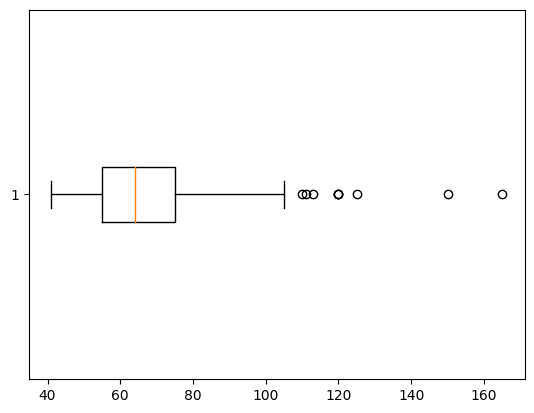

In [122]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

In [123]:
outlier_df = pd.DataFrame
outlier_df = fig

    b.	Are there respondents in this survey that are suspected to be outliers based on their level of liking for Country and Hardrock music? How many? list them in a separate data frame.

In [128]:
liking_cols = ['Country', 'Metal or Hardrock']

liking_data = response_df[liking_cols]

Q1 = liking_data.quantile(0.25)
Q3 = liking_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = ((liking_data < lower_bound) | (liking_data > upper_bound)).any(axis=1)
outlier_count = outliers.sum()

outlier_data = response_df[outliers]

outlier_data
outlier_count

0

	c. Are there respondents in this survey that are suspected to be outliers based on their BMI or Education level? How many? list them in a separate data frame. BMI can be calculated using the following formula. 
    
`BMI=Weight/Height^2`

    The Weight has to be in kilograms and height in meters for the following formula. In the dataset, Weight is recorded in kilograms but Height is recorded in centimeters and has to be transformed to Meter.


In [138]:
BM = (response_df.Weight>130) | (response_df.Height<70)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [157]:
bmi_cols = ['Weight', 'Height']
bmi_data = response_df[bmi_cols]

# Calculate BMI
height_m = bmi_data['Height'] / 100
bmi_data.loc[:, 'BMI'] = bmi_data['Weight'] / (height_m ** 2)
bmi_data

C:\Users\ccobr\AppData\Local\Temp\ipykernel_12744\919561524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_data.loc[:, 'BMI'] = bmi_data['Weight'] / (height_m ** 2)


,Weight,Height,BMI
0,48.0,163.0,18.066167
1,58.0,163.0,21.829952
2,67.0,176.0,21.629649
3,59.0,172.0,19.943213
4,59.0,170.0,20.415225
...,...,...,...
1005,57.0,164.0,21.192742
1006,80.0,183.0,23.888441
1007,75.0,173.0,25.059307
1008,58.0,173.0,19.379197


    d.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Age? How many? list them in a separate data frame.

In [158]:
age_Q1 = response_df['Age'].quantile(0.25)
age_Q3 = response_df['Age'].quantile(0.75)
age_IQR = age_Q3 - age_Q1
age_lower_bound = age_Q1 - 1.5*age_IQR
age_upper_bound = age_Q3 + 1.5*age_IQR

age_outliers = ((response_df['Age'] < age_lower_bound) | (response_df['Age'] > age_upper_bound))
bmi_outliers = (bmi_data['BMI'] < 18.5) | (bmi_data['BMI'] > 25)

suspected_outliers = response_df[bmi_outliers | age_outliers]

    e.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Gender? How many? list them in a separate data frame.

In [160]:
bmi_cols = ['Weight', 'Height', 'Gender']
bmi_data = response_df[bmi_cols]

# Calculate BMI
height_m = bmi_data['Height'] / 100
bmi_data.loc[:, 'BMI'] = bmi_data['Weight'] / (height_m ** 2)

age_Q1 = response_df['Age'].quantile(0.25)
age_Q3 = response_df['Age'].quantile(0.75)
age_IQR = age_Q3 - age_Q1
age_lower_bound = age_Q1 - 1.5 * age_IQR
age_upper_bound = age_Q3 + 1.5 * age_IQR

age_outliers = ((response_df['Age'] < age_lower_bound) | (response_df['Age'] > age_upper_bound))
bmi_outliers = (bmi_data['BMI'] < 18.5) | (bmi_data['BMI'] > 25)

suspected_outliers = response_df[bmi_outliers & age_outliers]

# filter outliers based on gender
gender_outliers = suspected_outliers.groupby('Gender').apply(lambda x: bmi_outliers.loc[x.index].sum())
gender_outliers_df = gender_outliers.to_frame(name='count')

gender_outliers_df


C:\Users\ccobr\AppData\Local\Temp\ipykernel_12744\3498447562.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_data.loc[:, 'BMI'] = bmi_data['Weight'] / (height_m ** 2)


,count
Gender,
female,7
male,9


# Excercise 5
One of the most common approaches for fraud detection is using outlier detection. In this exercise, you will use 'creditcard.csv' from https://www.kaggle.com/mlg-ulb/creditcardfraud  to evaluate the effectiveness of outlier detection for credit card fraud detection. Pay attention that most of the columns in this data source are processed values to uphold data anonymity. Perform the following steps.

    a.	Check the state of the dataset for missing values and address them if any.

In [ ]:
transaction_df = pd.read_csv('creditcard.csv')
transaction_df

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

    b.	Using the column Class, which shows if the transaction has been fraudulent or not, find out what percentage of the transactions in the dataset are fraudulent. 

    c.	Using data visualization or the appropriate statistical set, and if necessary both, specify which univariate outliers have a relationship with the column Class? In other words, if the values of which column are outliers then we may suspect fraudulent activity? Which statistical test is appropriate here? 

    d.	First, use the K-Means algorithm to group the transactions into 200 clusters by the attributes that were found to have a relationship with the column Class in part c. Then, filter out the members of the clusters with less than 50 transactions. Does any of them contain significantly fraudulent transactions? 

    e.	If there are any clusters with significant fraudulent transactions, perform centroid analysis for them. 

# Excercise 6
In Chapter 5 and Chapter 8 we used ‘WH Report_preprocessed.csv’ which is the preprocessed version of ‘WH Report.csv’. Now that you have learned numerous data preprocessing skills, you will be preprocessing the dataset yourself.

    a.	Check the status of the dataset for missing values. 

Level 1 and level 2 cleaning required

In [2]:
country_df = pd.read_csv('WH Report.csv')
country_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


Level 3 cleaning required

    b.	Check the status of the dataset for outliers.

In [3]:
country_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


also level 3 cleaning required since we're addressing the missing values

    c.	We would like to cluster the countries based on their happiness indices over the years. Based on these analytic goals, address the missing values.

    d.	Based on the listed goal in c, address the outliers.

    e.	Does data need any level Ⅰ or level Ⅱ data cleaning, before clustering is possible? If any, prepare the dataset for k-means clustering.

    f.	Perform K-means clustering to separate the countries into three groups, and do all the possible analytics that one does when clustering.

# Excercise 7

Specify if the following items describe random errors or systematic errors.

    a.	The data has these types of errors as the thermometer that the lab has purchased can give precise readings to one-thousandth of a degree
    b.	The data has these types of errors the survey records were gathered by 5 different surveyors who attended 5 rigorous training sessions
    c.	The data has these types of errors because when asking for salary questions in a survey there were no options such as “I would not like to share”
    d.	The data has these types of errors because the cameras were tampered with so the rubbery would not be tapped. 


# Excercise 8
Study Figure 11.14 one more time, and run the first three Exercises by the flowchart in this figure and note down the path that led to our decisions regarding the missing values. Did we take steps in dealing with missing values that were not listed in this figure or this chapter? Would it be better to have a more complex figure so every possibility would be included, or not? Why or why not?

# Excercise 9
Explain why the following statement is incorrect: A row may have a significant number of MCAR missing values.